<a href="https://colab.research.google.com/github/MarcinKalinski/Malaria-Binary-Classification-Model/blob/main/Projekt_ko%C5%84cowy_po_konsultacji_Malaria_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Malaria Cell Binary Classification 
Convolutional Nneural Netrwork
Baseline Model 1

In [3]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#Variables: dataset_path, model_path, image width & height, batch_size
import os

dataset_path = '/content/drive/MyDrive/cell_images'
model_path = '/content/drive/MyDrive/cell_classification'
image_width = 64
image_height = 64
batch_size = 256
print(os.listdir(dataset_path))

['Parasitized', 'Uninfected']


In [1]:
#Image read, image type and shape
import cv2
image = cv2.imread('/content/drive/MyDrive/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png')


In [2]:
type(image)

NoneType

In [5]:
image.shape

(208, 148, 3)

In [18]:
# Generator (training set)
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode = 'binary',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
)

Found 26525 files belonging to 2 classes.
Using 21220 files for training.


In [19]:
# Generator (validation set)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode = 'binary',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
)

Found 26525 files belonging to 2 classes.
Using 5305 files for validation.


In [8]:
# Class names
train_ds.class_names

['Parasitized', 'Uninfected']

In [9]:
# Preview of images shapes and labels in first batch
for images, labels in train_ds.take(1):
    i = images
    l = labels

In [10]:
i.shape

TensorShape([32, 64, 64, 3])

In [11]:
l.shape

TensorShape([32, 1])

In [12]:
l

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [13]:
i[0]

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

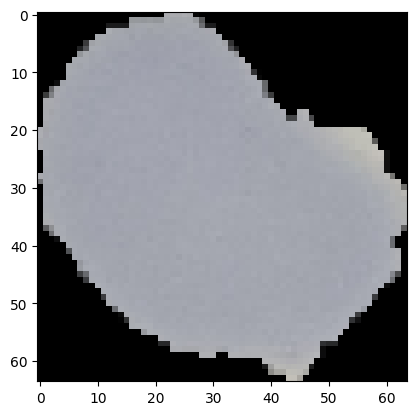

In [14]:
#Image previev
from matplotlib import pyplot as plt
plt.imshow(i[0].numpy().astype('uint8'))

In [20]:
#CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

#Sequential model
model = Sequential()
#Rescaling - normalisation to values from 0 to 1
model.add(Rescaling(1./255))

#Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
# 62x62 pix
model.add(MaxPooling2D((2, 2)))
# 31x31 pix
model.add(Conv2D(64, (3, 3), activation='relu'))
# 29x29 pix
model.add(MaxPooling2D((2, 2)))
# +Conv, filt 5x5, 7x7
# 14x14 pix
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Dense layers for classification
model.add(Dense(64, activation='relu'))
# + Dense
model.add(Dense(1, activation='sigmoid'))  # 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds,batch_size=batch_size, epochs=10,validation_data=val_ds)

Epoch 1/5
83/83 [==============================] - 487s 6s/step - loss: 0.6730 - accuracy: 0.5975 - val_loss: 0.6235 - val_accuracy: 0.6647
Epoch 2/5
83/83 [==============================] - 11s 118ms/step - loss: 0.5980 - accuracy: 0.6886 - val_loss: 0.5750 - val_accuracy: 0.7201
Epoch 3/5
83/83 [==============================] - 11s 118ms/step - loss: 0.5521 - accuracy: 0.7269 - val_loss: 0.5210 - val_accuracy: 0.7506
Epoch 4/5
83/83 [==============================] - 11s 118ms/step - loss: 0.4951 - accuracy: 0.7713 - val_loss: 0.4642 - val_accuracy: 0.8132
Epoch 5/5
83/83 [==============================] - 11s 118ms/step - loss: 0.3804 - accuracy: 0.8461 - val_loss: 0.3345 - val_accuracy: 0.8795


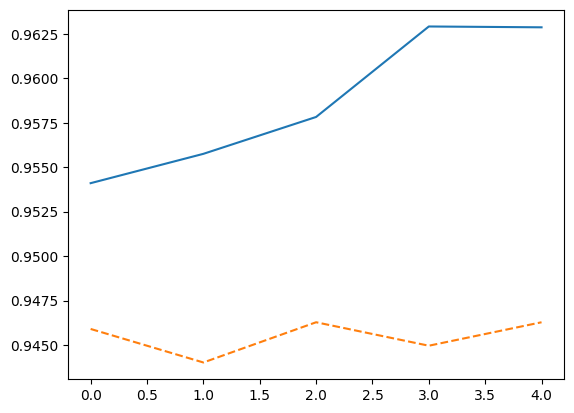

In [26]:
#Metrics plot: Traning accuracy and validation accuracy
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'], '--')


In [30]:
#Saving the model
model.save(model_path)

In [32]:
#Model load
from tensorflow import keras
model_2 = keras.models.load_model(model_path)

In [60]:
#Sample image class prediction
import numpy as np
image = cv2.imread('/content/drive/MyDrive/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png')
image_resize = cv2.resize(image, (image_width, image_height))
result = model.predict(np.array([image_resize]))
train_ds.class_names[int(result[0][0])]


1/1 [==============================] - 0s 25ms/step


'Parasitized'

In [37]:
#LIME
! pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=8ed408fc73f344576cae2480d49454e1e4f80fbed5f7a96eac24c2dde927040c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [47]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(i[2].numpy().astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


In [41]:
explanation

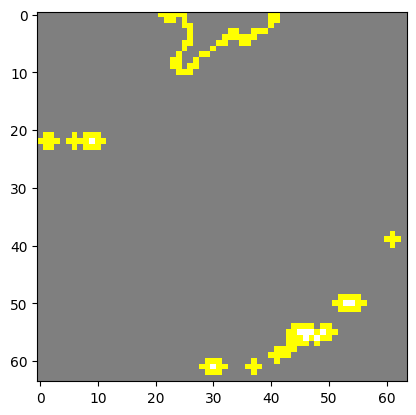

In [48]:
#Visual explanation of selected image classified to the class
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [43]:
#Labels preview
l

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

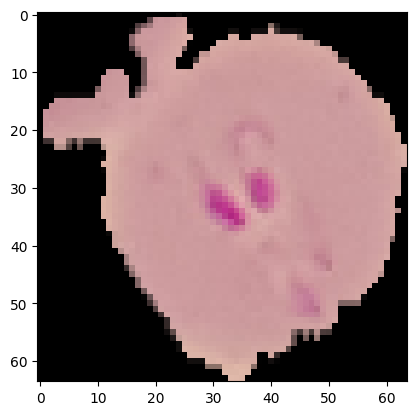

In [49]:
#Image Preview
plt.imshow(i[2].numpy().astype('uint8'))